In [1]:
import xhermes
from xhermes.utils import guard_replace_1d
import xbout
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


In [8]:
ds = xhermes.open(
    ".",  ## Replace with your path to 1D-threshold solution
    keep_yboundaries = True
    )

ds = ds.hermes.extract_1d_tokamak_geometry()

In [9]:
ds.coords

Coordinates:
    dx       (pos) float64 3kB dask.array<chunksize=(102,), meta=np.ndarray>
    dy       (pos) float64 3kB dask.array<chunksize=(102,), meta=np.ndarray>
    dz       (pos) float64 3kB dask.array<chunksize=(102,), meta=np.ndarray>
  * t        (t) float64 408B 0.0 5e-05 0.0001 0.00015 ... 0.0024 0.00245 0.0025
    x        int64 8B 0
    y        (pos) float64 3kB 0.0715 0.2143 0.3568 0.499 ... 30.28 30.29 30.3
    z        float64 8B 3.142
  * pos      (pos) float64 3kB -0.2141 -0.07125 0.07125 ... 30.0 30.0 30.01

In [10]:


#  ds.isel(t=-1)                          # Last timestep (index selection)
#  ds.sel(t = slice(0.01, None))          # Select times from 0.01 seconds to final timestep (value selection)
#  ds.sel(t = -1, pos = -1)               # Final timestep and final cell
#  ds.sel(pos = 5, method = "nearest")    # Select cell nearest to position of 5m



Text(0, 0.5, 'Temperature [eV]')

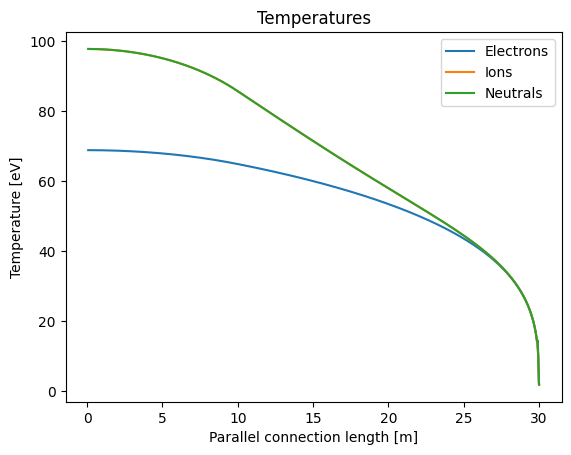

In [11]:


ds2 = ds.isel(pos = slice(2,-2), t = -1)  # Select domain without guard cells and final timestep

fig, ax = plt.subplots()
ds2["Te"].plot(ax = ax, label = "Electrons")
ds2["Td+"].plot(ax = ax, label = "Ions")
ds2["Td"].plot(ax = ax, label = "Neutrals")
ax.legend()
ax.set_title("Temperatures")
ax.set_ylabel("Temperature [eV]")



Target values:
Te:  2.087636751192547
Td+:  1.8356361144864173
Td:  1.8356361144864173


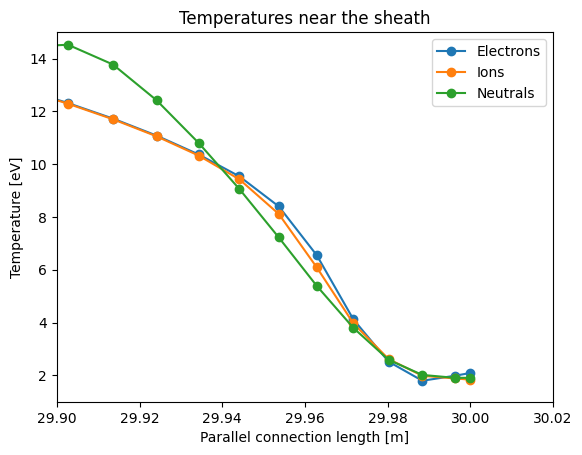

In [12]:
ds2 = ds.isel(t=-1)   # select final timestep, keep boundaries

spar = guard_replace_1d(ds2["pos"].values)

fig, ax = plt.subplots()
ax.plot(spar, guard_replace_1d(ds2["Te"]), label = "Electrons", marker = "o")
ax.plot(spar, guard_replace_1d(ds2["Td+"]), label = "Ions", marker = "o")
ax.plot(spar, guard_replace_1d(ds2["Td"]), label = "Neutrals", marker = "o")

ax.legend()
ax.set_title("Temperatures near the sheath")
ax.set_xlabel("Parallel connection length [m]")
ax.set_ylabel("Temperature [eV]")
ax.set_xlim(29.9, 30.02)
ax.set_ylim(1,15)

print("Target values:")
print("Te: ", guard_replace_1d(ds2["Te"]).isel(pos = -1).values)
print("Td+: ", guard_replace_1d(ds2["Td+"]).isel(pos = -1).values)
print("Td: ", guard_replace_1d(ds2["Td+"]).isel(pos = -1).values)

Text(0.5, 1.0, 'Time history of domain electron temperature')

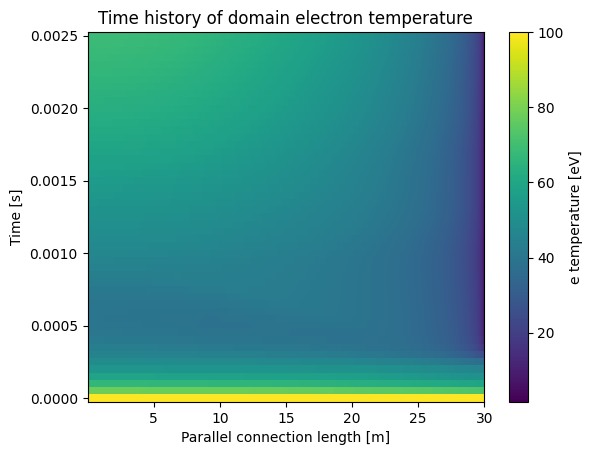

In [13]:
ds2 = ds.isel(pos = slice(2,-2))  # Select domain without guard cells, but all timesteps

fig, ax = plt.subplots()

ds2["Te"].plot(ax = ax)
ax.set_title("Time history of domain electron temperature")

Text(0.5, 1.0, 'Target temperature history')

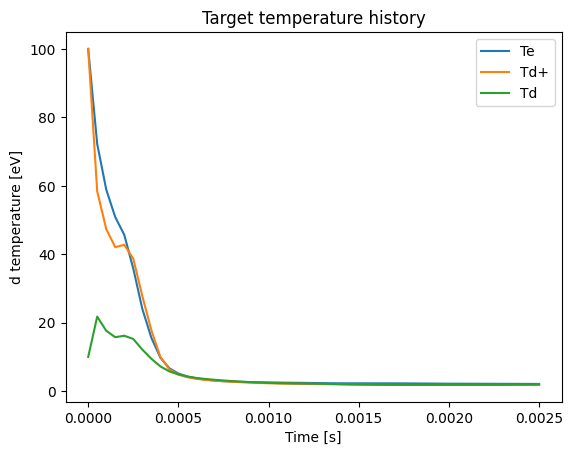

In [14]:
fig, ax = plt.subplots()

guard_replace_1d(ds["Te"]).isel(pos=-1).plot(ax = ax, label = "Te")
guard_replace_1d(ds["Td+"]).isel(pos=-1).plot(ax = ax, label = "Td+")
guard_replace_1d(ds["Td"]).isel(pos=-1).plot(ax = ax, label = "Td")
ax.legend()

ax.set_title("Target temperature history")

Final excitation radiation domain integral: -170.30 MW



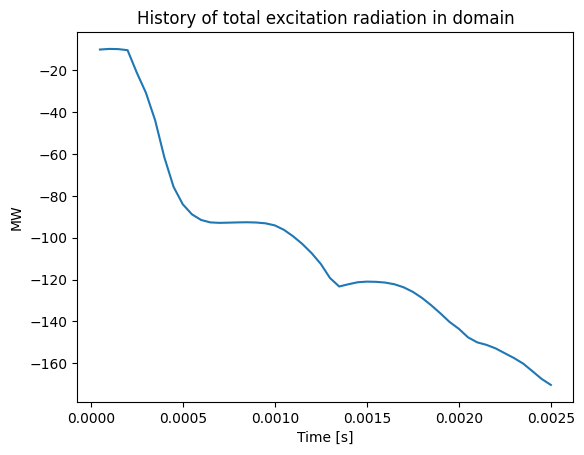

In [15]:


ds2 = ds.isel(pos = slice(2,-2))  # Drop guards

total_radiation = (ds2["Rd+_ex"] * ds2["dv"]).sum("pos") * 1e-6   # Sum of MW/m3 times m3 over domain

print(f"Final excitation radiation domain integral: {total_radiation.isel(t=-1).values:.2f} MW")

total_radiation.isel(t=slice(1,None)).plot()
plt.title("History of total excitation radiation in domain")
plt.ylabel("MW")
print()   # Blank print, otherwise notebooks print the last line by default..



In [16]:
for name in ds:
    param = ds[name]
    
    if "units" in param.attrs:
        print(f'{name} [{param.attrs["units"]}]: {param.attrs["long_name"]}')
    else:
        print(f'{name}: Attributes not yet implemented')


Bxy: Attributes not yet implemented
Ed+_VgradP [W / m^-3]: d+ energy source due to pressure gradient
Ed+_iz [W / m^3]: Energy transfer due to ionisation of d to d+
Ed+_rec [W / m^3]: Energy transfer due to recombination of d+ to d
Ed_VgradP [W / m^-3]: d energy source due to pressure gradient
Ed_target_recycle [W m^-3]: Target recycling energy source of d
Edd+_cx [W / m^3]: Energy transfer to d from d+ due to CX with d+
Ee_VgradP [W / m^-3]: e energy source due to pressure gradient
Fd+_iz [kg m^-2 s^-2]: Momentum transfer due to ionisation of d to d+
Fd+_rec [kg m^-2 s^-2]: Momentum transfer due to recombination of d+ to d
Fdd+_cx [kg m^-2 s^-2]: Momentum transfer to d from d+ due to CX with d+
G1: Attributes not yet implemented
G2: Attributes not yet implemented
G3: Attributes not yet implemented
J [m/radian T]: Jacobian to translate from flux to cylindrical coordinates in real space
Kd+_cond [s^-1]: collision frequency for conduction
Kd_cond [s^-1]: collision frequency for conduction

In [17]:


ds.metadata



{'BOUT_VERSION': 5.12,
 'Bnorm': 1.0,
 'Cs0': 97871.51425755137,
 'HERMES_REVISION': 'bb1dfc1dfad0c4a106b3db308088d4c0c81e3a64',
 'HERMES_SLOPE_LIMITER': 'MC',
 'MXG': 0,
 'MXSUB': 1,
 'MYG': 2,
 'MYPE': 0,
 'MYSUB': 100,
 'MZ': 1,
 'MZG': 0,
 'MZSUB': 1,
 'NXPE': 1,
 'NYPE': 4,
 'NZPE': 1,
 'Nnorm': 1e+19,
 'Omega_ci': 95788333.03066081,
 'PE_XIND': 0,
 'PE_YIND': 0,
 'Tnorm': 100.0,
 'ZMAX': 1.0,
 'ZMIN': 0.0,
 'has_adios2': 0,
 'has_caliper': 0,
 'has_cuda': 0,
 'has_fftw': 1,
 'has_gettext': 1,
 'has_hypre': 0,
 'has_lapack': 0,
 'has_netcdf': 1,
 'has_petsc': 1,
 'has_pretty_function': 1,
 'has_pvode': 1,
 'has_raja': 0,
 'has_scorep': 0,
 'has_slepc': 0,
 'has_sundials': 1,
 'has_umpire': 0,
 'hist_hi': 50,
 'ixseps1': -1,
 'ixseps2': -1,
 'jyseps1_1': -1,
 'jyseps1_2': 200,
 'jyseps2_1': 200,
 'jyseps2_2': 399,
 'nx': 1,
 'ny': 400,
 'ny_inner': 200,
 'nz': 1,
 'openmp_threads': 1,
 'rho_s0': 0.0010217477552952484,
 'run_id': '256f15ec-e070-40f8-b879-b5b51261dc8b',
 'run_restart

In [18]:


print(ds.options.as_tree())



root
 |- IncIntShear = false
 |- MXG = 0
 |- MYG = 2
 |- ZMAX = 1
 |- ZMIN = 0
 |- append = false
 |- async_send = false
 |- datadir = examples/tokamak-1D/1D-threshold/
 |- dump_on_restart = true
 |- json_database_dir = /users/sr1937/scratch/hermes-3/json_database
 |- non_uniform = true
 |- nout = 50
 |- optionfile = BOUT.inp
 |- periodicX = false
 |- restart = false
 |- settingsfile = BOUT.settings
 |- stopCheck = false
 |- stopCheckName = BOUT.stop
 |- timestep = 95788 * 0.05
 |- twistshift = false
 |- wall_limit = -1
 |- NVd
 |   |- evolve_bndry = false
 |- NVd+
 |   |- evolve_bndry = false
 |   |- function = 0
 |- Nd
 |   |- evolve_bndry = false
 |   |- function = 0.001
 |   |- neumann_boundary_average_z = false
 |   |- source = <Field3D>
 |   |- source_only_in_core = false
 |   |- source_time_dependent = false
 |- Nd+
 |   |- evolve_bndry = false
 |   |- function = 1
 |   |- neumann_boundary_average_z = false
 |   |- source = <Field3D>
 |   |- source_only_in_core = false
 |   |- s